In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('movies_1980_2020_30k.csv')

df

,Title,Director,Genre,Release Date,Duration,Rating
0,Key entire popular.,Anthony Becker,Horror,1981-05-12,102,6.8
1,Gun husband reveal.,William Johnson,Documentary,2016-06-13,92,7.6
2,Crime cover.,Amy Le,Drama,1988-03-22,144,5.5
3,Challenge.,Andrea Martinez,Romance,2013-04-01,161,2.0
4,Close study.,Michael Rodgers,Fantasy,2012-10-18,177,3.7
...,...,...,...,...,...,...
29995,Daughter.,Richard Nelson,Romance,2007-03-12,177,8.0
29996,Simply.,Jeffrey Hatfield,Fantasy,2011-08-16,126,5.7
29997,Also authority nor.,Ryan Brown,Action,1998-05-07,73,4.9
29998,Total report upon.,Melissa Stephenson,Comedy,2008-06-06,145,6.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         30000 non-null  object        
 1   Director      30000 non-null  object        
 2   Genre         30000 non-null  object        
 3   Release Date  30000 non-null  datetime64[ns]
 4   Duration      30000 non-null  int64         
 5   Rating        30000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 1.4+ MB


In [8]:
df['Release Date'] = pd.to_datetime( df['Release Date'] )

In [11]:
df['Year'] = df['Release Date'].dt.year

In [12]:
df

,Title,Director,Genre,Release Date,Duration,Rating,Year
0,Key entire popular.,Anthony Becker,Horror,1981-05-12,102,6.8,1981
1,Gun husband reveal.,William Johnson,Documentary,2016-06-13,92,7.6,2016
2,Crime cover.,Amy Le,Drama,1988-03-22,144,5.5,1988
3,Challenge.,Andrea Martinez,Romance,2013-04-01,161,2.0,2013
4,Close study.,Michael Rodgers,Fantasy,2012-10-18,177,3.7,2012
...,...,...,...,...,...,...,...
29995,Daughter.,Richard Nelson,Romance,2007-03-12,177,8.0,2007
29996,Simply.,Jeffrey Hatfield,Fantasy,2011-08-16,126,5.7,2011
29997,Also authority nor.,Ryan Brown,Action,1998-05-07,73,4.9,1998
29998,Total report upon.,Melissa Stephenson,Comedy,2008-06-06,145,6.9,2008


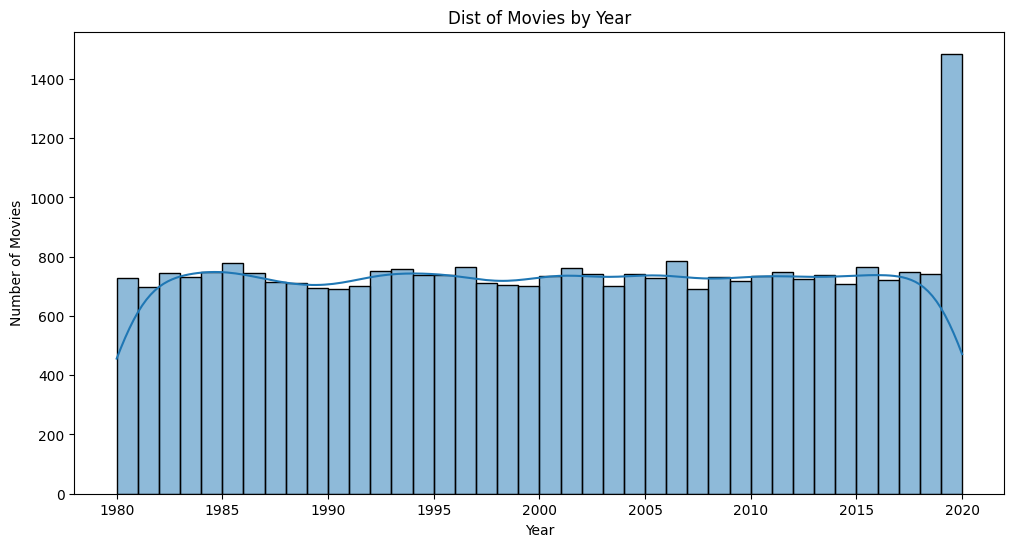

In [24]:
plt.figure( figsize=(12,6) )

sns.histplot( df['Year'], bins=40, kde=True   )

plt.title('Dist of Movies by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.show()

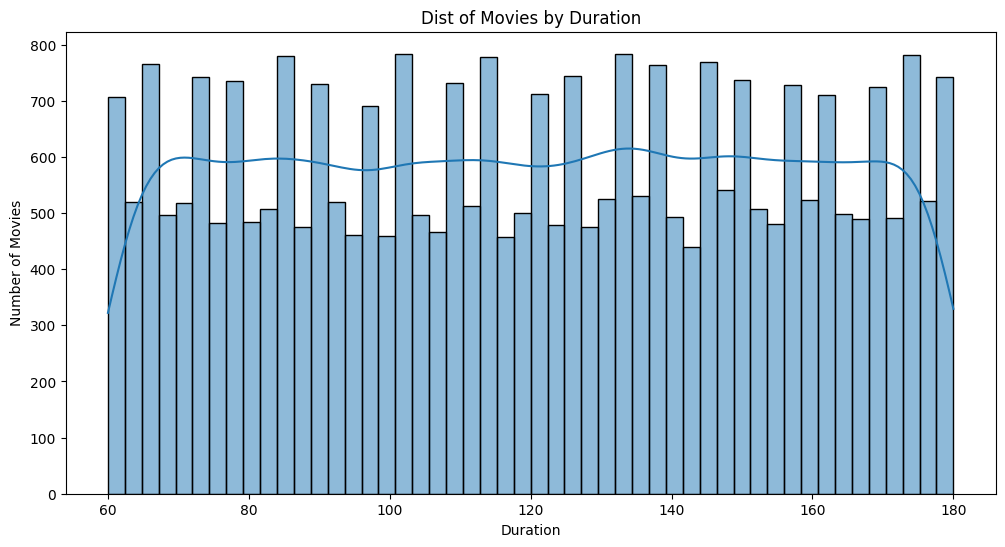

In [26]:
plt.figure( figsize=(12,6) )

sns.histplot( df['Duration'], bins=50, kde=True   )

plt.title('Dist of Movies by Duration')
plt.xlabel('Duration')
plt.ylabel('Number of Movies')

plt.show()

In [29]:
avg_rating_by_genre = df.groupby('Genre')['Rating'].mean()

avg_rating_by_genre.sort_values()


Genre
Thriller       5.464864
Drama          5.482596
Romance        5.496088
Action         5.520205
Sci-Fi         5.529679
Horror         5.530525
Fantasy        5.532032
Comedy         5.532536
Adventure      5.546187
Documentary    5.564650
Name: Rating, dtype: float64

In [32]:
top_directors = df['Director'].value_counts().head(10)


top_directors

Director
James Smith          13
Christopher Smith    12
Lisa Smith           11
Michael Miller       10
Michael Smith        10
John Smith           10
Jennifer Smith       10
David Smith          10
Jessica Johnson       9
David Davis           9
Name: count, dtype: int64

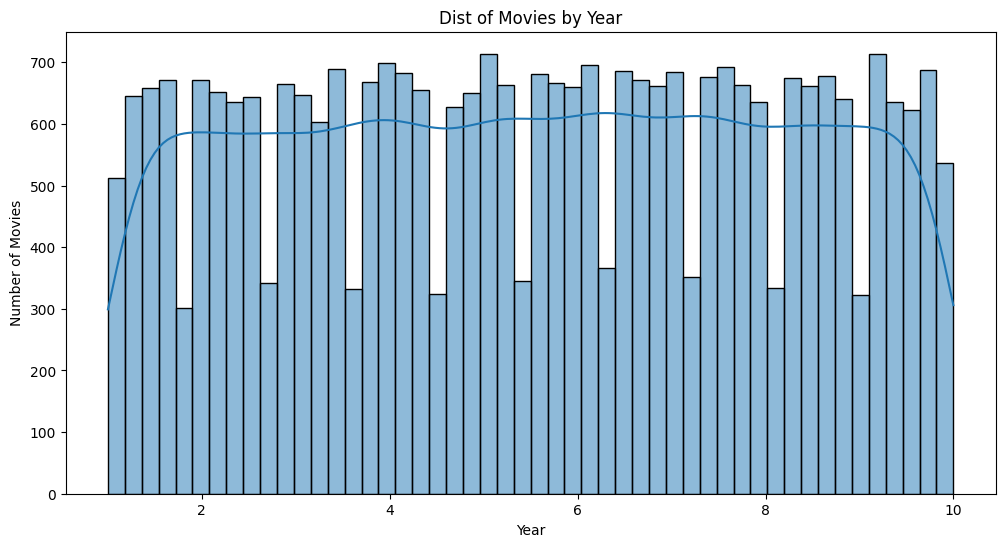

In [34]:
plt.figure( figsize=(12,6) )

sns.histplot( df['Rating'], bins=50, kde=True   )

plt.title('Dist of Movies by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.show()

In [35]:
import networkx as nx

In [52]:
top_20_directors = df['Director'].value_counts().head(20).index

In [54]:
filtered_df = df[ df['Director'].isin( top_20_directors ) ]

In [55]:
G_top_director_genre = nx.Graph()

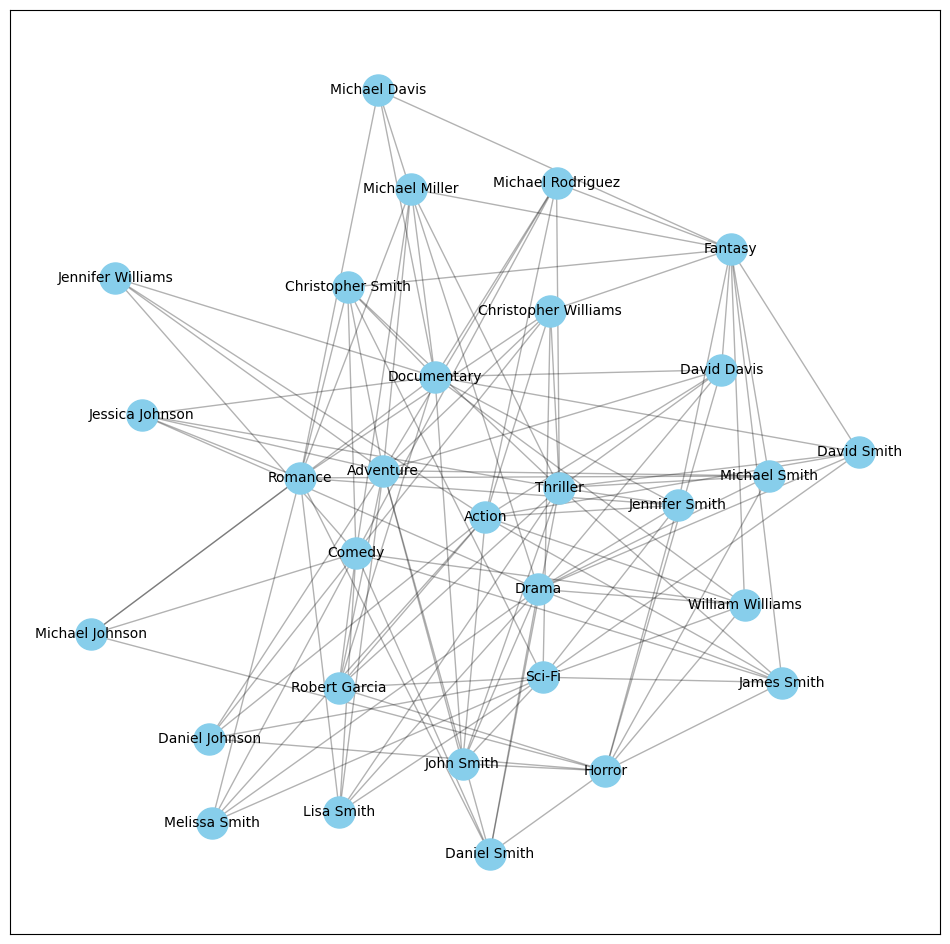

In [71]:
for _,row in filtered_df.iterrows():
  G_top_director_genre.add_edge( row['Director'], row['Genre'] )




plt.figure( figsize=(12,12) )

pos = nx.spring_layout( G_top_director_genre, k=0.15    )
nx.draw_networkx_nodes(G_top_director_genre , pos, node_size= 500, node_color='skyblue' )
nx.draw_networkx_edges(G_top_director_genre,pos, alpha=0.3)

nx.draw_networkx_labels(G_top_director_genre, pos, font_size=10  )

plt.show()